# Spatial Analysis of the Slave-Trade-Database

In this Notebook, I will use the data from the __[Slave Voyages-Database](https://www.slavevoyages.org/)__ to visualize it spatially and ANALYSIS

XXXXXXXThe data about the starting point and end point of the slave voyages below can be used the map the data. Unfortunately coordinates are not attached to the SPSS-data-file, so I have to rely on additional data which can be found on this __[website](https://guides.library.ucsc.edu/DS/Resources/Class-Specific/LALS194E/MappingData)__ for adding geographical coordinates.

XXXXXXAs a cartographer, geoinformation scientist and historian, my main interest of research lies in the spatiality of historical processes. Therefore, my future plan on working with this datset is to perform a toponym resolution for the location data. Then I can use the dataset to create maps for visualizing the data and spatially analyze the slave voyages. Possible analysis functions could be hotspot detection or spatial clustering. I'm also thinking about creating animated maps but I don't know if this is possible with python.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature
import plotly.express as px
from shapely.geometry import LineString

In [2]:
slave_voyages = pd.read_csv("../Novak_slave_voyages/datasets/slave_voyages_processed.csv")

In [3]:
slave_voyages.head()

,VOYAGEID,BOYRAT7,CREW1,CREWDIED,DATEBUY,DATELAND1,FATE,FATE2,GIRLRAT7,GUNS,...,VYMRTRAT,WOMRAT7,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP,YRCONS
0,1,NaN,NaN,NaN,NaN,1817-01-16,Sold slaves in Americas - subsequent fate unknown,Slaves disembarked Americas,NaN,NaN,...,0.28,NaN,1816-20,1811-20,1801-25,1800.0,1816.0,1817.0,1816.0,NaN
1,2,NaN,30.0,NaN,NaN,1817-01-17,Voyage completed as intended,Slaves disembarked Americas,NaN,NaN,...,NaN,NaN,1816-20,1811-20,1801-25,1800.0,1817.0,1817.0,1816.0,NaN
2,3,NaN,28.0,NaN,NaN,1817-01-17,Voyage completed as intended,Slaves disembarked Americas,NaN,NaN,...,0.14,NaN,1816-20,1811-20,1801-25,1800.0,1817.0,1817.0,1816.0,NaN
3,4,NaN,NaN,NaN,NaN,1817-02-27,Sold slaves in Americas - subsequent fate unknown,Slaves disembarked Americas,NaN,NaN,...,0.10,NaN,1816-20,1811-20,1801-25,1800.0,1817.0,1817.0,1816.0,NaN
4,5,NaN,NaN,NaN,NaN,1817-03-14,Voyage completed as intended,Slaves disembarked Americas,NaN,NaN,...,NaN,NaN,1816-20,1811-20,1801-25,1800.0,1817.0,1817.0,1817.0,NaN


relevant columns from this dataset for GEOTAGGING???? (Koordinaten zuweisen) are:

MJBPTIMP - principal place of slave purchase

MJSLPTIMP - principal place of slave landing IMP

so I'm going to ... THIS COLUMNS

new columns with Name coord_start and coord_end

In [4]:
# import spatial coordinates as a second file
ports = pd.read_csv("../Novak_slave_voyages/datasets/slave-voyages-ports.csv")

In [5]:
ports.head()

,port,port_id,region,long,lat
0,Alicante,10101,Spain,0,0
1,Barcelona,10102,Spain,2.18333,41.38333
2,Bilbao,10103,Spain,-2.96667,43.25
3,Cadiz,10104,Spain,-6.29944,36.53361
4,Figuera,10105,Spain,0,0


In [5]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


C:\Users\andre\AppData\Local\Temp\ipykernel_11972\2607368865.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


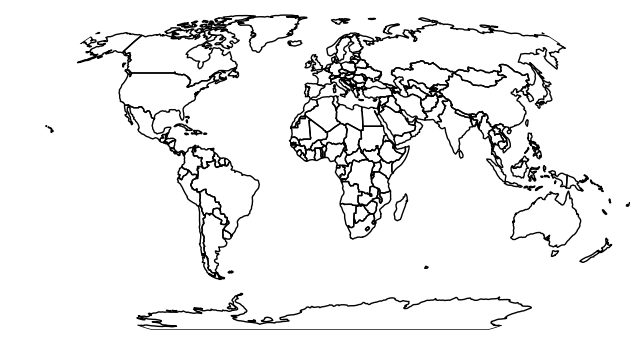

In [7]:
world_plt = gplt.polyplot(world, projection=gcrs.Robinson())

In [8]:
clist = ["wheat","navy","firebrick","darkorange","grey","olivedrab","darkorchid","limegreen"]
clist_css = ["#f5deb3","#000080","#b22222","#ff8c00","#808080","#6b8e23","#9932cc","#32cd32"]
cmap= ListedColormap(clist)

In [9]:
sv_small = slave_voyages[["SLAXIMP","NATINIMP","MJBYPTIMP"]]

In [10]:
#adding 2 new columns to dataframe
sv_small["coord_start_lng"]=""
sv_small["coord_start_lat"]=""
sv_small["coord_end_lng"]=""
sv_small["coord_end_lat"]=""

C:\Users\andre\AppData\Local\Temp\ipykernel_22296\1389763970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_small["coord_start_lng"]=""
C:\Users\andre\AppData\Local\Temp\ipykernel_22296\1389763970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_small["coord_start_lat"]=""
C:\Users\andre\AppData\Local\Temp\ipykernel_22296\1389763970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [11]:
sv_small_grouped = sv_small[["SLAXIMP","NATINIMP","MJBYPTIMP"]].groupby(["NATINIMP","MJBYPTIMP"]).sum().reset_index()

In [12]:
sv_small_grouped['coord_start_lng'] = sv_small_grouped.apply(lambda x: ports.loc[ports['port'] == x['MJBYPTIMP'], 'long'].reset_index(drop=True).values[0] if x['MJBYPTIMP'] in ports['port'].values else None, axis=1)
sv_small_grouped['coord_start_lat'] = sv_small_grouped.apply(lambda x: ports.loc[ports['port'] == x['MJBYPTIMP'], 'lat'].reset_index(drop=True).values[0] if x['MJBYPTIMP'] in ports['port'].values else None, axis=1)
#sv_small['coord_end_lng'] = sv_small.apply(lambda x: ports.loc[ports['port'] == x['MJSLPTIMP'], 'long'].reset_index(drop=True).values[0] if x['MJSLPTIMP'] in ports['port'].values else None, axis=1)
#sv_small['coord_end_lat'] = sv_small.apply(lambda x: ports.loc[ports['port'] == x['MJSLPTIMP'], 'lat'].reset_index(drop=True).values[0] if x['MJSLPTIMP'] in ports['port'].values else None, axis=1)

In [13]:
geometry = gpd.points_from_xy(sv_small_grouped.coord_start_lng,sv_small_grouped.coord_start_lat)
#create geodataframe
sv_small_geo = gpd.GeoDataFrame(sv_small_grouped,geometry=geometry)

In [14]:
non_empty_geometries = sv_small_geo[sv_small_geo['geometry'].notna() & ~sv_small_geo['geometry'].is_empty]

C:\Users\andre\AppData\Local\Temp\ipykernel_22296\3798467417.py:1: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  non_empty_geometries = sv_small_geo[sv_small_geo['geometry'].notna() & ~sv_small_geo['geometry'].is_empty]


In [15]:
non_empty_geometries["coord_start_lat"].max()

'9.48039'

Text(0.5, 1.0, 'Volcanoes')

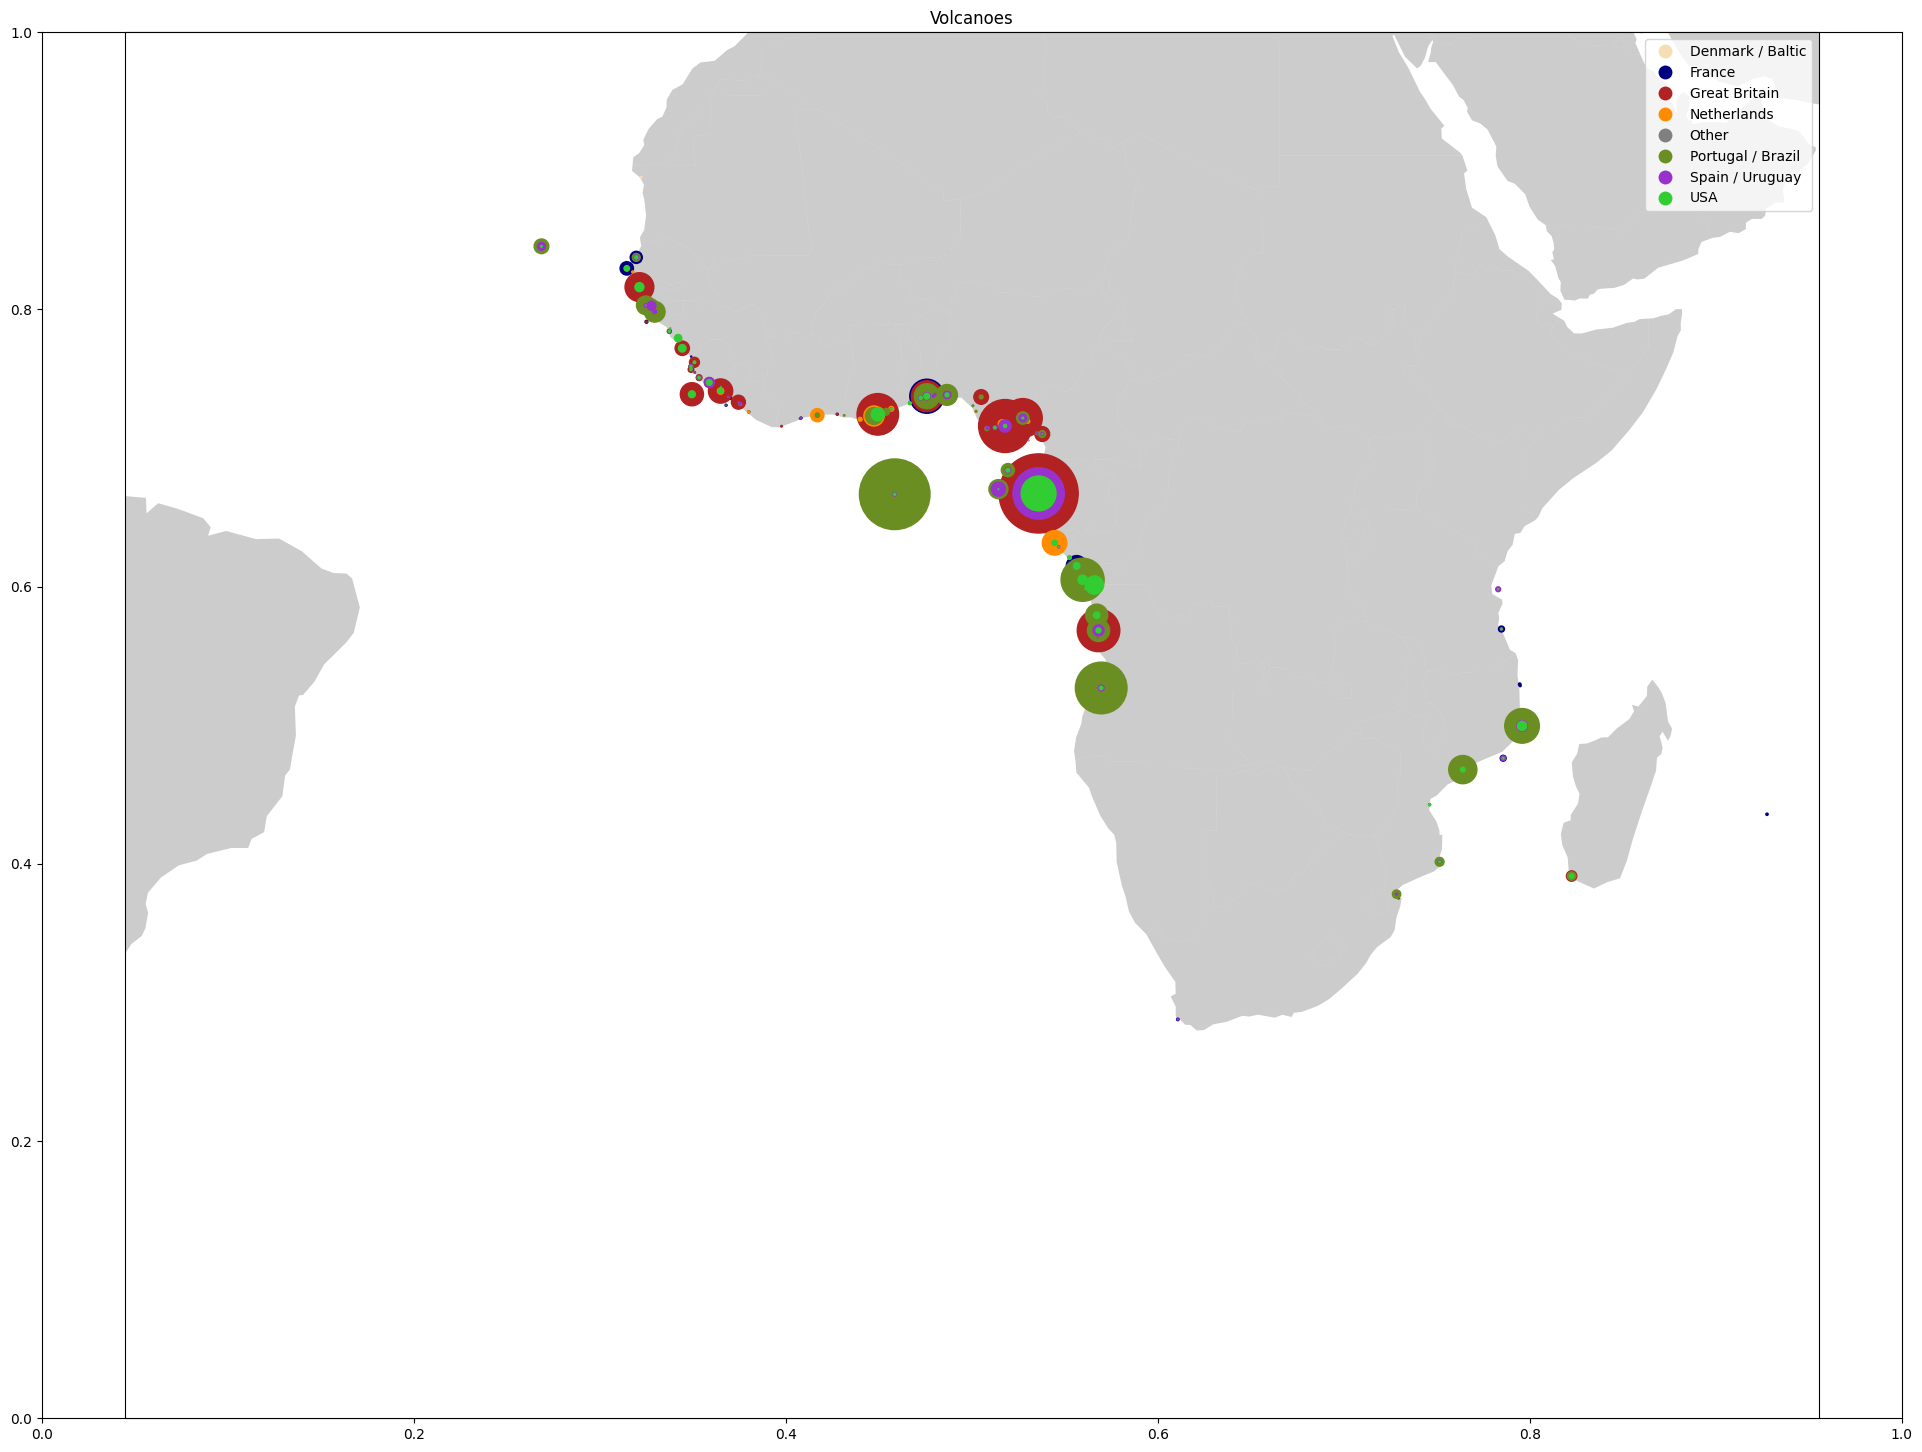

In [16]:
fig, ax = plt.subplots(figsize=(24, 18))
ax = plt.axes(projection=ccrs.Robinson())
world.plot(ax=ax, alpha=0.4, color="grey")
non_empty_geometries.plot("NATINIMP",ax=ax, legend=True,cmap=cmap,markersize=non_empty_geometries["SLAXIMP"]/250)
ax.set_xlim([-50, 60])
ax.set_ylim([-60, 30])
plt.title("Volcanoes")

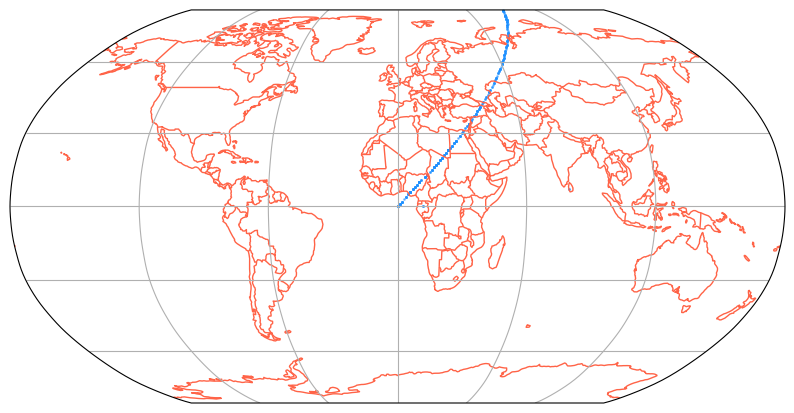

In [17]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=non_empty_geometries.coord_start_lng, y=non_empty_geometries.coord_start_lat,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

plt.show()


In [18]:
fig = px.scatter_mapbox(non_empty_geometries,
                        color=non_empty_geometries.NATINIMP,
                        color_discrete_sequence=clist,
                        lat=non_empty_geometries.geometry.y,
                        lon=non_empty_geometries.geometry.x,
                        size=non_empty_geometries.SLAXIMP,
                        hover_name=non_empty_geometries.MJBYPTIMP,
                        hover_data = {"NATINIMP": True, "SLAXIMP": ':,'},
                        size_max=35,
                        center={'lat': 0, 'lon': 20},
                        zoom=2,
                        labels={"NATINIMP": "Countries","SLAXIMP": "number of imported slaves"}
                        )

#for trace in fig.data:
 #   trace.update(visible='legendonly')

#fig.data[1].update(visible="legendonly")
#fig.data[2].update(visible="legendonly")
#fig.data[3].update(visible="legendonly")
#fig.data[4].update(visible="legendonly")
#fig.data[5].update(visible="legendonly")
#fig.data[6].update(visible="legendonly")
#fig.data[7].update(visible="legendonly")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0,"l": 0, "b": 0})
fig.show()

# zielgebiete

In [19]:
sv_small2 = slave_voyages[["SLAXIMP","NATINIMP","MJSLPTIMP"]]

In [20]:
#adding 2 new columns to dataframe
sv_small2["coord_end_lng"]=""
sv_small2["coord_end_lat"]=""

C:\Users\andre\AppData\Local\Temp\ipykernel_22296\1362471813.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\andre\AppData\Local\Temp\ipykernel_22296\1362471813.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
sv_small2_grouped_end = sv_small2[["SLAXIMP","NATINIMP","MJSLPTIMP"]].groupby(["NATINIMP","MJSLPTIMP"]).sum().reset_index()

In [22]:
sv_small2_grouped_end['coord_end_lng'] = sv_small2_grouped_end.apply(lambda x: ports.loc[ports['port'] == x['MJSLPTIMP'], 'long'].reset_index(drop=True).values[0] if x['MJSLPTIMP'] in ports['port'].values else None, axis=1)
sv_small2_grouped_end['coord_end_lat'] = sv_small2_grouped_end.apply(lambda x: ports.loc[ports['port'] == x['MJSLPTIMP'], 'lat'].reset_index(drop=True).values[0] if x['MJSLPTIMP'] in ports['port'].values else None, axis=1)

In [23]:
geometry2 = gpd.points_from_xy(sv_small2_grouped_end.coord_end_lng,sv_small2_grouped_end.coord_end_lat)
#create geodataframe
sv_small_geo2 = gpd.GeoDataFrame(sv_small2_grouped_end,geometry=geometry2)

In [24]:
non_empty_geometries2 = sv_small_geo2[sv_small_geo2['geometry'].notna() & ~sv_small_geo2['geometry'].is_empty]

C:\Users\andre\AppData\Local\Temp\ipykernel_22296\676229814.py:1: UserWarning:

GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)



Text(0.5, 1.0, 'Volcanoes')

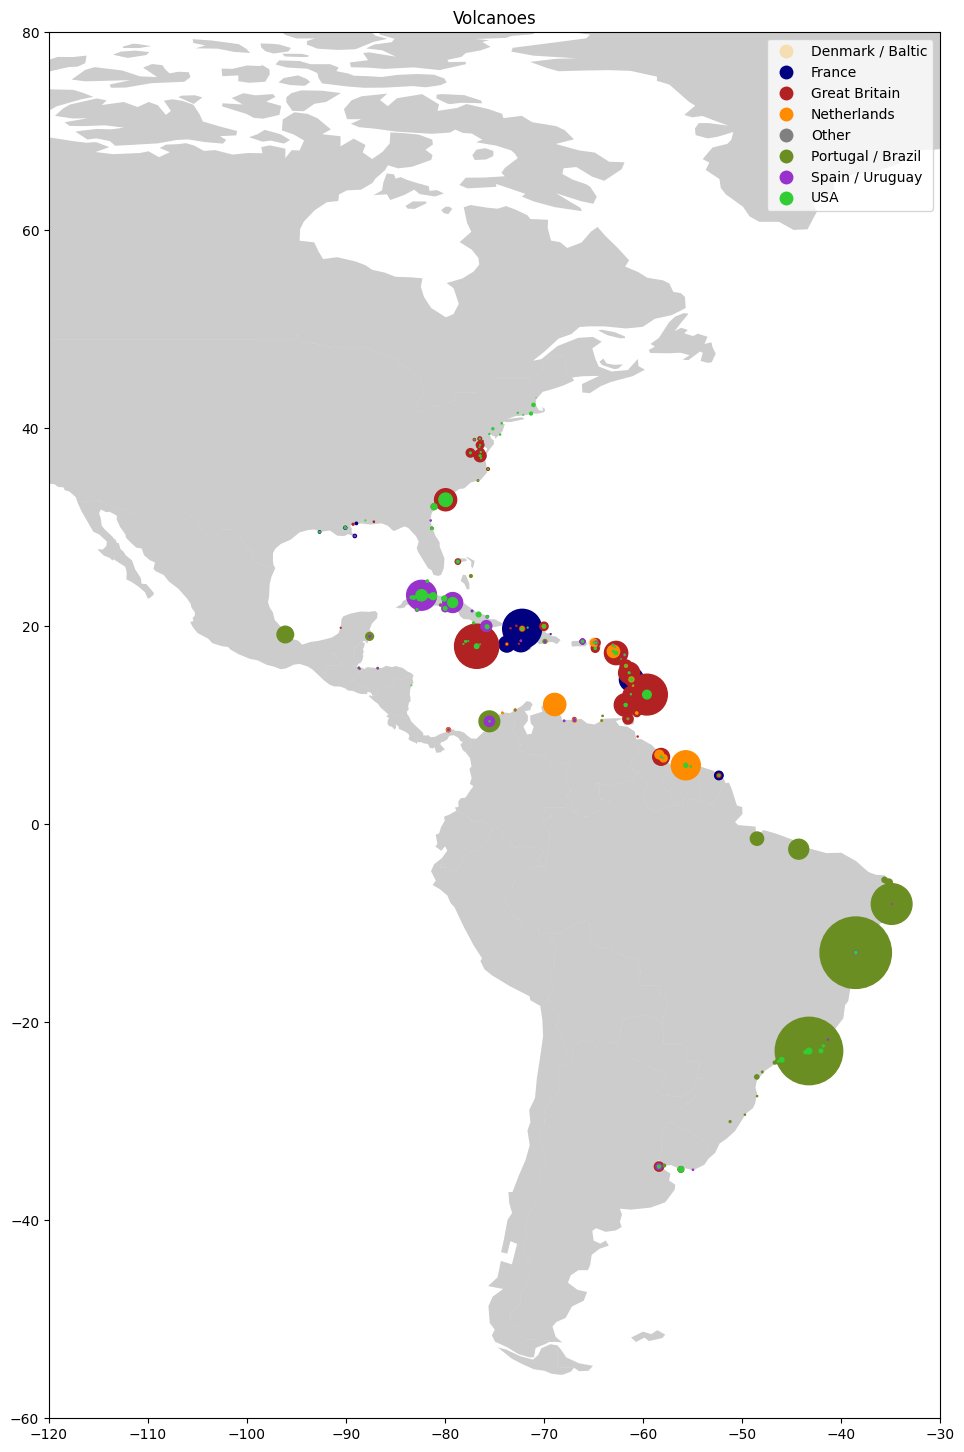

In [25]:
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
non_empty_geometries2.plot("NATINIMP",ax=ax, legend=True,cmap=cmap,markersize=non_empty_geometries2["SLAXIMP"]/500)
ax.set_xlim([-120, -30])
ax.set_ylim([-60, 80])
plt.title("Volcanoes")

In [26]:
fig = px.scatter_mapbox(non_empty_geometries2,
                        color=non_empty_geometries2.NATINIMP,
                        color_discrete_sequence=clist,
                        lat=non_empty_geometries2.geometry.y,
                        lon=non_empty_geometries2.geometry.x,
                        size=non_empty_geometries2.SLAXIMP,
                        hover_name=non_empty_geometries2.MJSLPTIMP,
                        hover_data = {"NATINIMP": True, "SLAXIMP": ':,'},
                        size_max=35,
                        center={'lat': 0, 'lon': -70},
                        zoom=2,
                        labels={"NATINIMP": "Countries","SLAXIMP": "number of imported slaves"}
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0,"l": 0, "b": 0})
fig.show()

# ALL tets

In [6]:
sv_all = slave_voyages[["SLAXIMP","NATINIMP","MJBYPTIMP","MJSLPTIMP","YEARAM"]]

In [7]:
sv_all['coord_start_lng'] = sv_all.apply(lambda x: ports.loc[ports['port'] == x['MJBYPTIMP'], 'long'].reset_index(drop=True).values[0] if x['MJBYPTIMP'] in ports['port'].values else None, axis=1)
sv_all['coord_start_lat'] = sv_all.apply(lambda x: ports.loc[ports['port'] == x['MJBYPTIMP'], 'lat'].reset_index(drop=True).values[0] if x['MJBYPTIMP'] in ports['port'].values else None, axis=1)
sv_all['coord_end_lng'] = sv_all.apply(lambda x: ports.loc[ports['port'] == x['MJSLPTIMP'], 'long'].reset_index(drop=True).values[0] if x['MJSLPTIMP'] in ports['port'].values else None, axis=1)
sv_all['coord_end_lat'] = sv_all.apply(lambda x: ports.loc[ports['port'] == x['MJSLPTIMP'], 'lat'].reset_index(drop=True).values[0] if x['MJSLPTIMP'] in ports['port'].values else None, axis=1)

C:\Users\andre\AppData\Local\Temp\ipykernel_11972\3547324800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_all['coord_start_lng'] = sv_all.apply(lambda x: ports.loc[ports['port'] == x['MJBYPTIMP'], 'long'].reset_index(drop=True).values[0] if x['MJBYPTIMP'] in ports['port'].values else None, axis=1)
C:\Users\andre\AppData\Local\Temp\ipykernel_11972\3547324800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_all['coord_start_lat'] = sv_all.apply(lambda x: ports.loc[ports['port'] == x['MJBYPTIMP

In [43]:
sv_all

,SLAXIMP,NATINIMP,MJBYPTIMP,MJSLPTIMP,YEARAM,coord_start_lng,coord_start_lat,coord_end_lng,coord_end_lat
0,404.0,Portugal / Brazil,Mozambique,"Bahia, port unspecified",1817.0,40.73576,-15.03846,-38.51083,-12.97111
1,246.0,Portugal / Brazil,Mozambique,"Bahia, port unspecified",1817.0,40.73576,-15.03846,-38.51083,-12.97111
2,405.0,Portugal / Brazil,Cabinda,"Bahia, port unspecified",1817.0,12.2,-5.55,-38.51083,-12.97111
3,381.0,Portugal / Brazil,Quilimane,"Bahia, port unspecified",1817.0,36.88833,-17.87861,-38.51083,-12.97111
4,578.0,Portugal / Brazil,Cabinda,"Bahia, port unspecified",1817.0,12.2,-5.55,-38.51083,-12.97111
...,...,...,...,...,...,...,...,...,...
36103,490.0,Portugal / Brazil,Benguela,Rio de Janeiro,1849.0,13.40722,-12.57833,-43.23333,-22.9
36104,490.0,France,Benguela,Rio de Janeiro,1850.0,13.40722,-12.57833,-43.23333,-22.9
36105,401.0,NaN,Benguela,NaN,1851.0,13.40722,-12.57833,None,None
36106,118.0,Portugal / Brazil,Benguela,Rio de Janeiro,1851.0,13.40722,-12.57833,-43.23333,-22.9


In [8]:
test = sv_all.dropna(subset=['coord_start_lng', 'coord_start_lat', 'coord_end_lng', 'coord_end_lat'])

In [31]:
geometry = [LineString([(start_lon, start_lat), (end_lon, end_lat)]) for
            start_lat, start_lon, end_lat, end_lon in
            zip(test['coord_start_lat'], test['coord_start_lng'], test['coord_end_lat'], test['coord_end_lng'])]

In [32]:
gdf_lines = gpd.GeoDataFrame(test, geometry=geometry)

(-30.0, 50.0)

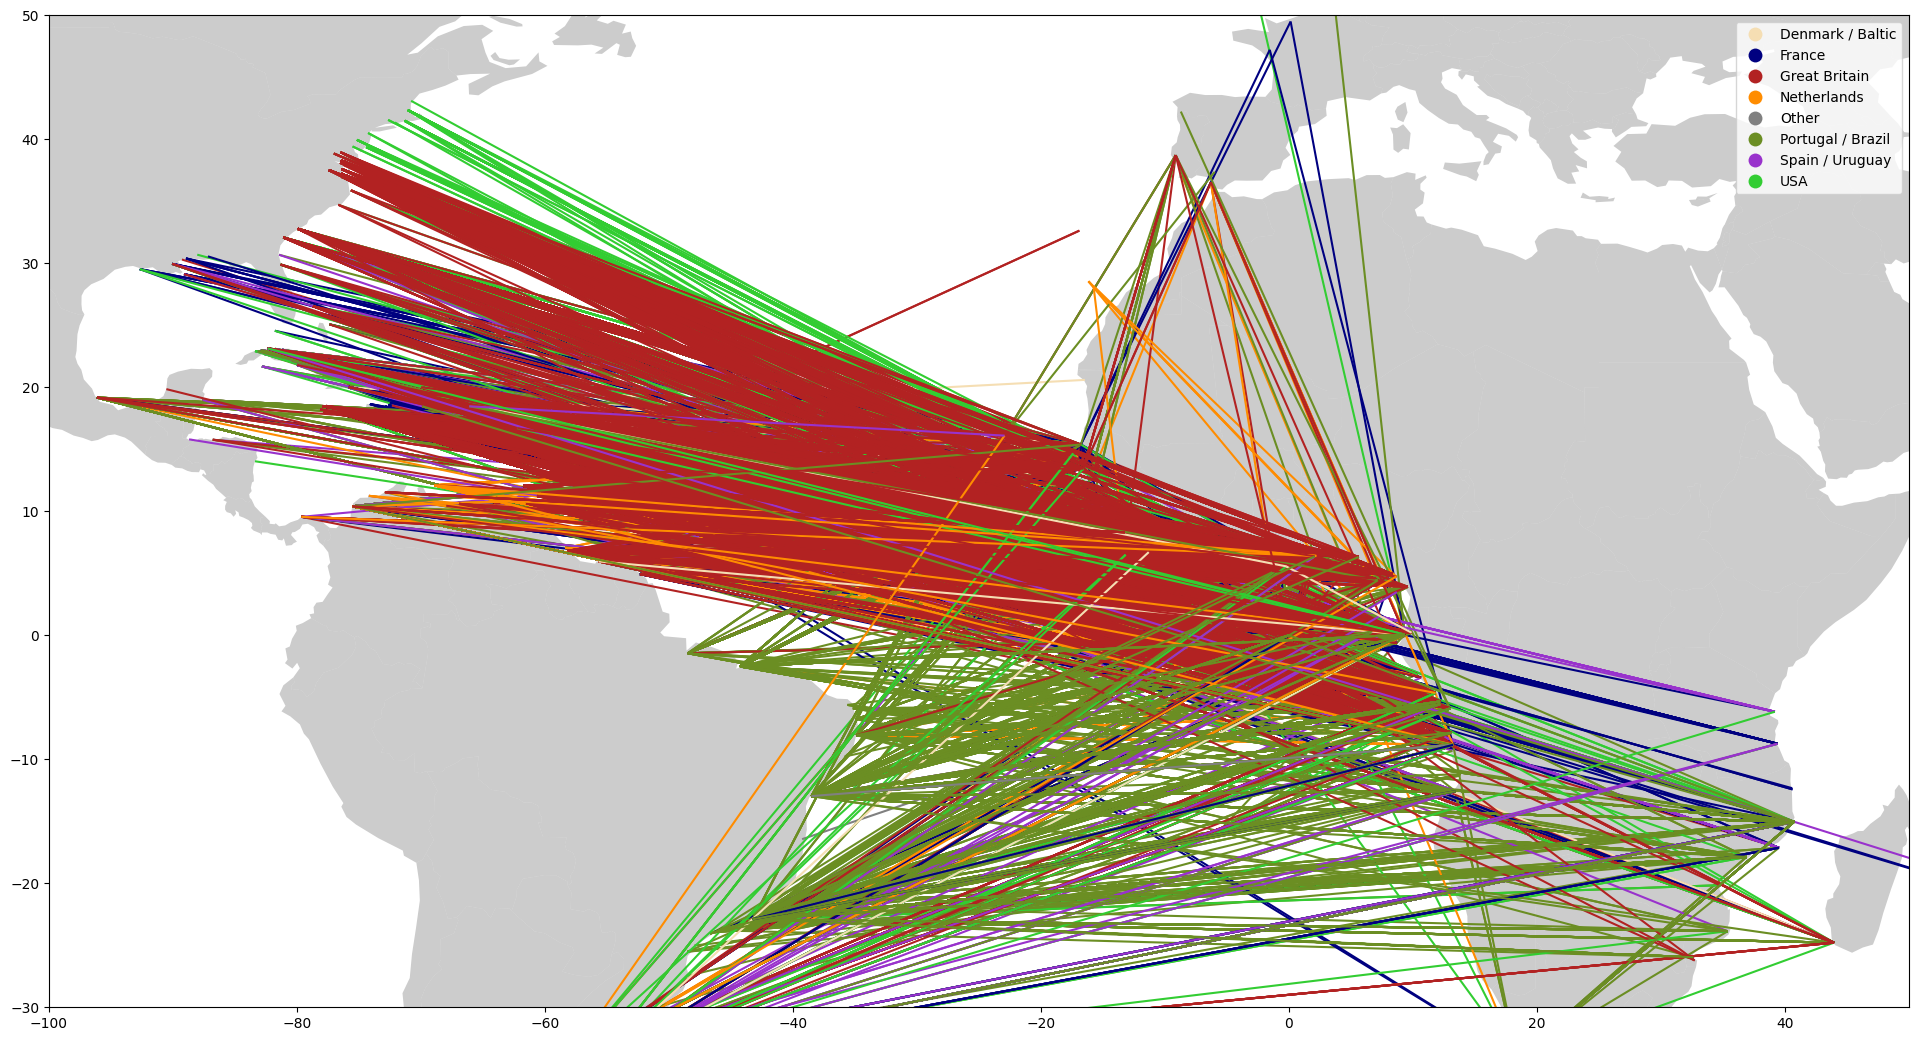

In [33]:
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
gdf_lines.plot("NATINIMP",ax=ax, legend=True,cmap=cmap)
ax.set_xlim([-100, 50])
ax.set_ylim([-30, 50])

In [34]:
start_geometry = gpd.points_from_xy(test['coord_start_lng'], test['coord_start_lat'])
end_geometry = gpd.points_from_xy(test['coord_end_lng'], test['coord_end_lat'])

In [35]:
gdf_start = gpd.GeoDataFrame(test, geometry=start_geometry)
gdf_end = gpd.GeoDataFrame(test, geometry=end_geometry)

In [36]:
from shapely.geometry import Point
import plotly.graph_objects as go

In [42]:
test

,SLAXIMP,NATINIMP,MJBYPTIMP,MJSLPTIMP,YEARAM,coord_start_lng,coord_start_lat,coord_end_lng,coord_end_lat,geometry
0,404.0,Portugal / Brazil,Mozambique,"Bahia, port unspecified",1817.0,40.73576,-15.03846,-38.51083,-12.97111,"LINESTRING (40.73576 -15.03846, -38.51083 -12...."
1,246.0,Portugal / Brazil,Mozambique,"Bahia, port unspecified",1817.0,40.73576,-15.03846,-38.51083,-12.97111,"LINESTRING (40.73576 -15.03846, -38.51083 -12...."
2,405.0,Portugal / Brazil,Cabinda,"Bahia, port unspecified",1817.0,12.2,-5.55,-38.51083,-12.97111,"LINESTRING (12.2 -5.55, -38.51083 -12.97111)"
3,381.0,Portugal / Brazil,Quilimane,"Bahia, port unspecified",1817.0,36.88833,-17.87861,-38.51083,-12.97111,"LINESTRING (36.88833 -17.87861, -38.51083 -12...."
4,578.0,Portugal / Brazil,Cabinda,"Bahia, port unspecified",1817.0,12.2,-5.55,-38.51083,-12.97111,"LINESTRING (12.2 -5.55, -38.51083 -12.97111)"
...,...,...,...,...,...,...,...,...,...,...
36102,572.0,France,"West Central Africa and St. Helena, port unspe...",Rio de Janeiro,1848.0,13.23444,-8.83833,-43.23333,-22.9,"LINESTRING (13.23444 -8.83833, -43.23333 -22.9)"
36103,490.0,Portugal / Brazil,Benguela,Rio de Janeiro,1849.0,13.40722,-12.57833,-43.23333,-22.9,"LINESTRING (13.40722 -12.57833, -43.23333 -22.9)"
36104,490.0,France,Benguela,Rio de Janeiro,1850.0,13.40722,-12.57833,-43.23333,-22.9,"LINESTRING (13.40722 -12.57833, -43.23333 -22.9)"
36106,118.0,Portugal / Brazil,Benguela,Rio de Janeiro,1851.0,13.40722,-12.57833,-43.23333,-22.9,"LINESTRING (13.40722 -12.57833, -43.23333 -22.9)"


Notizen: noch möglich:

animierte Karte nach Jahreszahl

animierte Karte von Start zu End

Karte mit Jahreszahlen